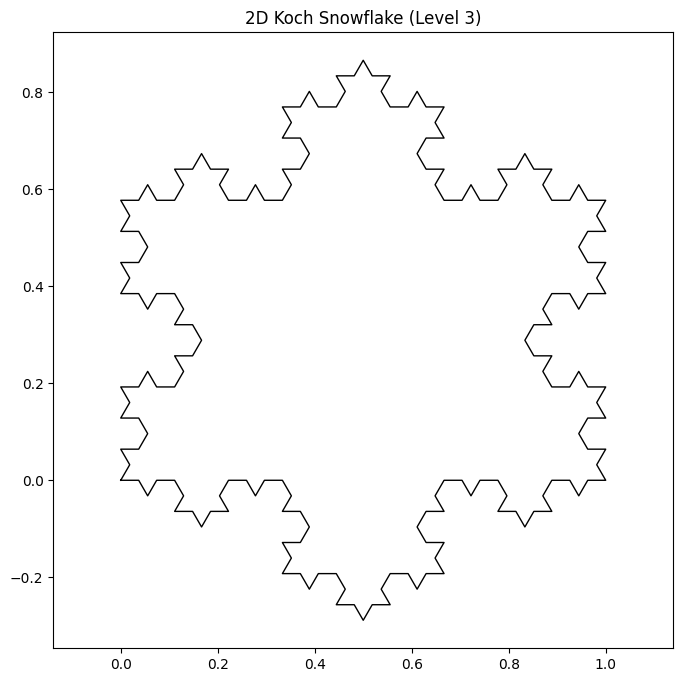

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def koch_snowflake(points, level):
    if level == 0:
        return points

    new_points = []
    for i in range(len(points) - 1):
        p1, p2 = points[i], points[i + 1]

        # Compute the three new points
        a = p1 + (p2 - p1) / 3  # 1/3rd along the segment
        b = p1 + 2 * (p2 - p1) / 3  # 2/3rd along the segment

        # Rotate to form an equilateral triangle
        angle = np.pi / 3  # 60 degrees
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                    [np.sin(angle), np.cos(angle)]])
        c = a + np.dot(rotation_matrix, (b - a))

        # Append new points
        new_points.extend([p1, a, c, b])

    new_points.append(points[-1])  # Append last point
    return koch_snowflake(np.array(new_points), level - 1)

# Initial equilateral triangle
triangle = np.array([[0, 0], [0.5, np.sqrt(3) / 2], [1, 0], [0, 0]])

# Generate Koch Snowflake points
level = 3 # Change for more/less detail
snowflake_points = koch_snowflake(triangle, level)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(snowflake_points[:, 0], snowflake_points[:, 1], color='black', linewidth=1)
plt.axis("equal")
plt.title(f"2D Koch Snowflake (Level {level})")
plt.show()

In [54]:
snowflake_points.shape

(12289, 2)

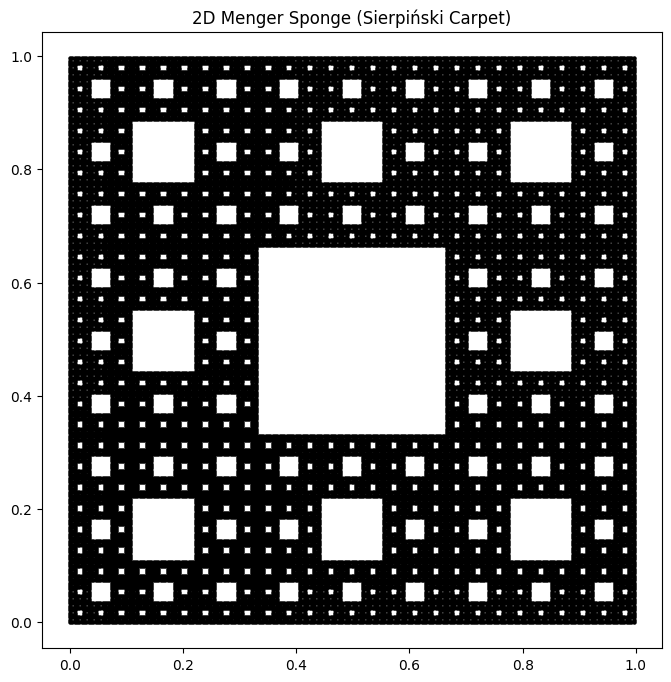

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_menger_sponge_2d(level, size=1.0):
    points = [(0, 0)]
    scale = size / 3.0

    for _ in range(level):
        new_points = []
        for x, y in points:
            for dx in range(3):
                for dy in range(3):
                    if (dx, dy) != (1, 1):  # Skip the center square
                        new_points.append((x + dx * scale, y + dy * scale))
        points = new_points
        scale /= 3.0

    return np.array(points)

# Generate 2D Menger Sponge Points
sponge_points = generate_menger_sponge_2d(level=5)

# Plotting the points
plt.figure(figsize=(8, 8))
plt.scatter(sponge_points[:, 0], sponge_points[:, 1], s=5, color='black')
plt.axis("equal")
plt.title("2D Menger Sponge (Sierpiński Carpet)")
plt.show()

In [2]:
sponge_points.shape

(32768, 2)

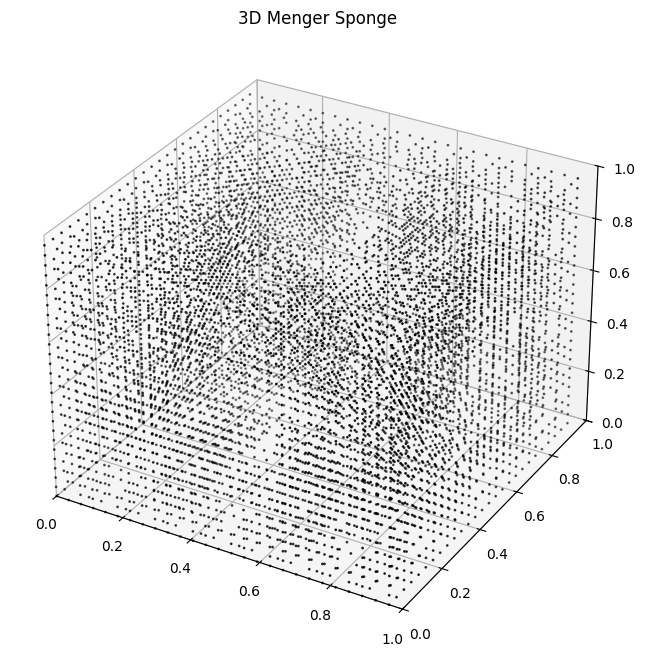

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_menger_sponge(level, size=1.0, offset=np.array([0, 0, 0])):
    if level == 0:
        return [offset]

    new_size = size / 3.0
    points = []

    # Iterate through all 3x3x3 positions
    for dx, dy, dz in itertools.product(range(3), repeat=3):
        if (dx, dy, dz) not in [(1, 1, 0), (1, 0, 1), (0, 1, 1), (1, 1, 1), (1, 1, 2), (1, 2, 1), (2, 1, 1)]:
            # Offset cubes for the next recursion level
            new_offset = offset + np.array([dx, dy, dz]) * new_size
            points.extend(generate_menger_sponge(level - 1, new_size, new_offset))

    return points

# Generate 3D Menger Sponge Points
level = 3  # Change this for more detail
sponge_points = np.array(generate_menger_sponge(level))

# Plot the 3D points
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sponge_points[:, 0], sponge_points[:, 1], sponge_points[:, 2], s=1, color='black')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_title("3D Menger Sponge")

plt.show()

In [2]:
sponge_points.shape

(8000, 3)

In [3]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 13.0 MB/s eta 0:00:00


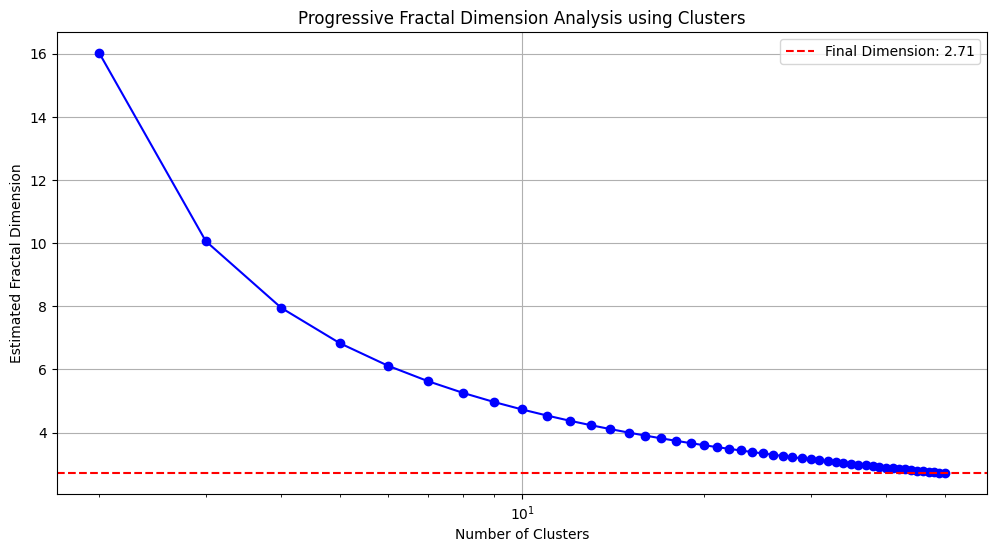


Number of clusters: 2
Cluster sizes: [3996 4004]
Cluster fractal dimensions: [11.96434087 11.96722626]
Total fractal dimension: 16.0179

Number of clusters: 3
Cluster sizes: [2285 2537 3178]
Cluster fractal dimensions: [7.03990059 7.13512641 7.34017581]
Total fractal dimension: 10.0616

Number of clusters: 4
Cluster sizes: [1901 2088 2067 1944]
Cluster fractal dimensions: [5.44627141 5.513953   5.50666134 5.46240625]
Total fractal dimension: 7.9461

Number of clusters: 5
Cluster sizes: [1641 1567 1203 1759 1830]
Cluster fractal dimensions: [4.59978048 4.57111031 4.40686383 4.64292576 4.6675123 ]
Total fractal dimension: 6.8266

Number of clusters: 6
Cluster sizes: [1309 1338 1373 1290 1309 1381]
Cluster fractal dimensions: [4.00557044 4.01780003 4.03221165 3.99741015 4.00557044 4.03545413]
Total fractal dimension: 6.1173

Number of clusters: 7
Cluster sizes: [ 994 1274 1280 1035 1052 1063 1302]
Cluster fractal dimensions: [3.54679131 3.67433041 3.67674497 3.56756282 3.57593509 3.58128

In [4]:
import faiss
import matplotlib.pyplot as plt

def cluster_fractal_analysis(data, max_clusters, min_clusters=2):
    #1st row - cluster_sizes
    #2nd row - fractal dimension of each box/cluster
    #3rd row - average.
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    results = []

    for k in range(min_clusters, max_clusters + 1):
        kmeans = faiss.Kmeans(d=n_features, k=k, niter=300, verbose=False)
        kmeans.train(data)
        _, labels = kmeans.index.search(data, 1)

        # Calculate cluster sizes
        unique, counts = np.unique(labels, return_counts=True)
        cluster_sizes = counts[counts > 0]

        # Calculate fractal dimension for each cluster
        cluster_fractal_dims = np.log(cluster_sizes) / np.log(k)

        # Calculate total fractal dimension
        log_n = np.log(k)
        log_m = np.log(np.sum(cluster_sizes * np.log(cluster_sizes)))
        total_dimension = log_m / log_n if log_n != 0 else np.nan

        # Store results
        results.append({
            'num_clusters': k,
            'cluster_sizes': cluster_sizes,
            'cluster_fractal_dims': cluster_fractal_dims,
            'total_fractal_dim': total_dimension
        })

    return results

def cluster_fractal_dimension(data, max_clusters, min_clusters=2):
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    dimensions = []
    cluster_counts = range(min_clusters, max_clusters + 1)

    for k in cluster_counts:
        kmeans = faiss.Kmeans(d=n_features, k=k, niter=300, verbose=False)
        kmeans.train(data)
        _, labels = kmeans.index.search(data, 1)

        # Calculate cluster sizes
        unique, counts = np.unique(labels, return_counts=True)
        cluster_sizes = counts[counts > 0]

        # Calculate fractal dimension using box-counting method
        log_n = np.log(k)
        log_m = np.log(np.sum(cluster_sizes * np.log(cluster_sizes)))
        dimension = log_m / log_n if log_n != 0 else np.nan

        dimensions.append(dimension)

    return cluster_counts, dimensions

def progressive_fractal_dimension(data, max_clusters, min_clusters=2):
    cluster_counts, dimensions = cluster_fractal_dimension(data, max_clusters, min_clusters)
    return cluster_counts, dimensions

# Example usage
if __name__ == "__main__":
    # Assuming random_normalized_embeddings is your dictionary of word embeddings
    normalized_embeddings = sponge_points
    n_samples = len(normalized_embeddings)
  #  n_features = len(list(normalized_embeddings.values())[0])
    embeddings_list = normalized_embeddings

    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    #word_embeddings_fractal = word_embeddings_fractal[0:100000]

    max_clusters = min(50, n_samples // 2)  # Adjust based on your data size
    cluster_counts, progressive_dims = progressive_fractal_dimension(word_embeddings_fractal, max_clusters)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(cluster_counts, progressive_dims, 'bo-')
    plt.xscale('log')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Estimated Fractal Dimension')
    plt.title('Progressive Fractal Dimension Analysis using Clusters')
    plt.grid(True)

    # Add final estimated dimension to the plot
    final_dim = progressive_dims[-1]
    plt.axhline(y=final_dim, color='r', linestyle='--', label=f'Final Dimension: {final_dim:.2f}')
    plt.legend()

    plt.show()


    results = cluster_fractal_analysis(word_embeddings_fractal, max_clusters)

    # Print results
    for result in results:
        print(f"\nNumber of clusters: {result['num_clusters']}")
        print("Cluster sizes:", result['cluster_sizes'])
        print("Cluster fractal dimensions:", result['cluster_fractal_dims'])
        print(f"Total fractal dimension: {result['total_fractal_dim']:.4f}")